# NOI: Zufallsprozesse und Quantisierung im Frequenzbereich #
## DFT von Breitbandsignalen (Musterlösung) ##

Dieses Notebook unterstützt die gleichnamige Übungsaufgabe. Thema ist die korrekte Skalierung und Interpretation der DFT von Breitbandsignalen (z.B. Rauschen) im Vergleich mit Schmalbandsignalen (z.B. Sinustöne).

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import numpy.random as rnd
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange,
                    linspace, array, zeros, ones)
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel,
    subplot, title, clf, xlim, ylim)

figsize = {"figsize":(15,10)}

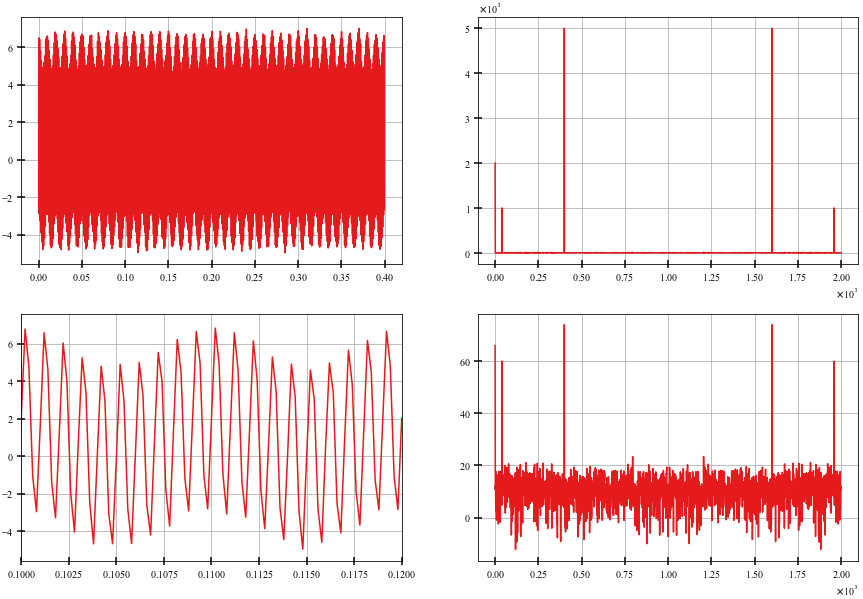

In [3]:
f_S = 5e3; T_S = 1. / f_S
N_FFT = 2000; t_max = N_FFT * T_S
f_a = 1e3; f_b = 1e2; 
A_a = 5; A_b = 1; NQ = 0.01
t = arange(0, t_max, T_S)
y = 1 + A_a * sin(2*pi*t*f_a) + A_b * cos(2*pi*t*f_b)
n = np.sqrt(NQ) * rnd.randn(len(t))
yn = y + n
Syn = fft(yn,N_FFT)
f = arange(N_FFT)
fig1 = plt.figure(1, **figsize)
gs = gridspec.GridSpec(2, 2) 
ax00 = plt.subplot(gs[0,0])
ax00.plot(t, yn)
ax01 = plt.subplot(gs[1,0])
ax01.plot(t, yn)
ax01.set_xlim((0.1,0.12))
ax02 = plt.subplot(gs[0,1])
ax02.plot(f,abs(Syn))
ax03 = plt.subplot(gs[1,1])
ax03.plot(f,20*log10(abs(Syn))); 

Die Plots aus der Aufgabenstellung müssen skaliert und interpretiert werden:

N = 0.01002 W oder -19.9921 dBW
N' = 1.00183e-05 W/Bin = -49.9921 dBW/Bin
S1 = 0.5 W = -3.0103 dBW
10.53243895988229
12.515718711595234


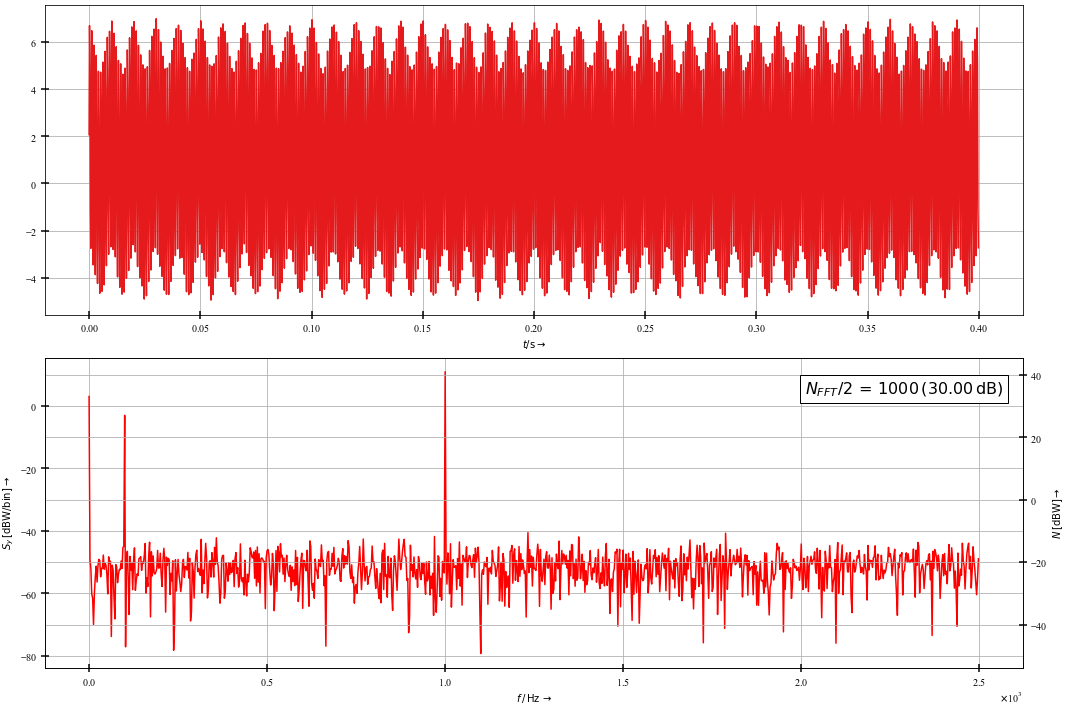

In [7]:
f_S = 5e3
T_S = 1. / f_S
N_FFT = 2000
N_FFT_2 = N_FFT // 2
t_max = N_FFT * T_S
f_1 = 1e3; a_1 = 1

k_1 = int(N_FFT * f_1 / f_S) # Index Frequenz 1

t = arange(0, t_max, T_S)
f_a = 1e3; f_b = 1e2; 
A_a = 5; A_b = 1; NQ = 0.01

y = 1 + A_a * sin(2*pi*t*f_a) + A_b * cos(2*pi*t*f_b)
n = np.sqrt(NQ) * rnd.randn(len(t))
yn = y + n
N_t = sum(n*n)/len(t) # Rauschleistung, berechnet im Zeitbereich
print('N = {0:.4g} W oder {1:g} dBW'.format(N_t, 10*log10(N_t)))
print("N' = {0:g} W/Bin = {1:g} dBW/Bin".format(N_t / N_FFT_2, 10*log10(N_t / N_FFT_2)))
print('S1 = {0:g} W = {1:g} dBW'.format(a_1*a_1/2, 10*log10(a_1*a_1/2)))
# DFT mit korrekten AMPLITUDEN für EINSEITIGES Spektrum
Syn = abs(fft(yn,N_FFT))[0:N_FFT_2]/ N_FFT_2
Nn = Syn.copy()
Nn[k_1] = Nn[k_1] - a_1
Syn = Syn * Syn / 2 # Berechne Leistung (pro bin)
Nn = Nn * Nn / 2 # Berechne Leistung (pro bin)
N_f = sum(Nn); print(N_f)

f = fftfreq(N_FFT, T_S)[0:N_FFT_2]

print (Syn[k_1])
#
fig1 = figure(1, **figsize)
ax1 = fig1.add_subplot(211)
ax1.plot(t, yn)
ax1.set_xlabel(r'$t / \mathrm{s} \rightarrow$')

ax21 = fig1.add_subplot(212)
ax21.plot(f,10*log10(Syn),'r') # Leistung in dBW/bin
#ax21.plot(f,10*log10(Syn/N_FFT_2),'b')
ax21.set_xlabel(r'$f \, / \, \mathrm{Hz} \, \rightarrow$')
ax21.set_ylabel(r'$S_y \, \mathrm{[dBW/bin]} \rightarrow$')
ylim21 = ax21.get_ylim()
ax22 = ax21.twinx()
ax22.set_ylim(ylim21 + 10*log10(N_FFT_2))
ax22.set_ylabel(r"$N \, \mathrm{[dBW]} \rightarrow$")
ax22.text(0.98,0.9,r'$N_{FFT}/2\, = \, %s \, (%.2f \, \mathrm{dB})$'
                            %(N_FFT_2, 10*log10(N_FFT_2)),
         fontsize=16, ha="right", va="center", linespacing=1.5,
         transform = ax22.transAxes,
         bbox=dict(boxstyle="square", fc='white'))

fig1.tight_layout(pad = 0.8, h_pad = 0.3);

## Fragen und Experimente ##

- Interpretieren Sie das Ergebnis / die Leistungen in Zeit- und Frequenzebene


***
**Copyright**

(c) 2016 - 2019 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2019*.